<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/final_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK - 1:** Load the UCI zoo dataset from https://archive.ics.uci.edu/dataset/111/zoo  <font color='red'>[MARK - 1]</font>

In [88]:
pip install ucimlrepo

In [89]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
zoo = fetch_ucirepo(id=111)

# data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets

# metadata
print(zoo.metadata)

# variable information
print(zoo.variables)


{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [141]:
dataset = pd.read_csv('https://archive.ics.uci.edu/static/public/111/data.csv')
dataset.drop('animal_name', axis=1, inplace=True)
dataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**TASK - 2:** Check the dataset for missing or duplicate values and handle them appropriately.    <font color='red'>[MARK - 1]</font>

In [142]:
duplicates = dataset.duplicated().sum()
print(f'No. of duplicates: {duplicates}')

#handle duplicates
dataset.drop_duplicates(inplace=True)
print(f'No. of duplicates after handling: {dataset.duplicated().sum()}')

No. of duplicates: 42
No. of duplicates after handling: 0


In [143]:
missing_values = dataset.isnull().sum()
print(f'No. of missing values: {missing_values.sum()}')
# as there are zero missing values so need to handle it

No. of missing values: 0


**TASK - 3:** Show the class distribution of the dataset. (Use BAR Plot.)    <font color='red'>[MARK - 1]</font>

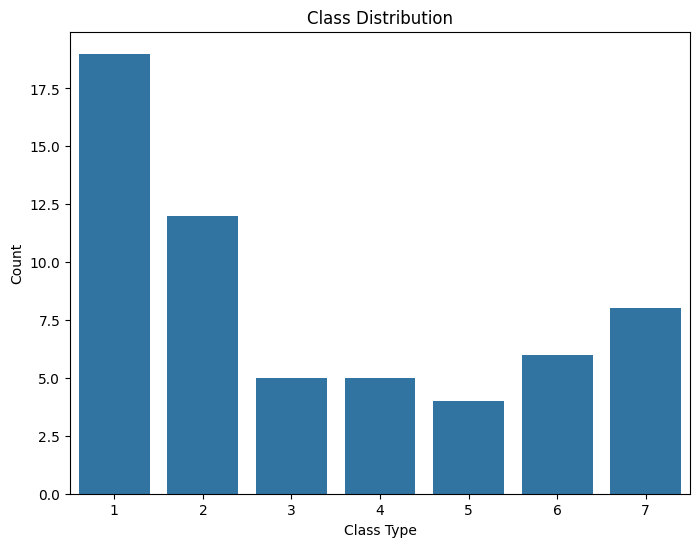

In [144]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=dataset) # Changed 'Feature' to 'class_type'
plt.title('Class Distribution')
plt.xlabel('Class Type')
plt.ylabel('Count')
plt.show()

**TASK - 4:** Split the data into training and test sets (80%-20%).      <font color='red'>[MARK - 1]</font>

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#dataset['type'] = le.fit_transform(dataset['type'])

#dataset.head()

In [145]:
# Split the data into training and test sets (80%-20%)
X = dataset.drop('type', axis=1)
Y = dataset['type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


**TASK - 5:** Implement Adaboost classifier from scratch for binary classification using decision tree stumps as the base estimator (use scikit-learn's DecisionTreeClassifier). Use an appropriate value of the number of base estimators.   <font color='red'>[MARK - 5]</font>

In [146]:

#  Define helper functions
def cal_error(y, y_pred, w_i):
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int))) / sum(w_i)

def cal_alpha(error):
    return 0.5 * np.log((1 - error) / (error + 1e-10) )

def _update_weights(w_i, alpha, y, y_pred):
    return w_i * np.exp(alpha * 2 * (np.not_equal(y, y_pred)).astype(int) - 1) / np.sum(w_i * np.exp(alpha * 2 * (np.not_equal(y, y_pred)).astype(int) - 1))

# Define AdaBoost class
class ScratchAdaBoost:
    def __init__(self):
        self.alphas = [] # List to store alphas
        self.weak_classifiers = [] # List to store weak classifiers
        self.no_of_estimators = None # Number of boosting rounds

    def fit(self, X, y, no_of_estimators):
        self.alphas = [] # Initialize the list for storing alpha values
        self.no_of_estimators = no_of_estimators # Store the number of boosting rounds

        no_of_samples = len(X) # Get the number of samples in the dataset
        weights = np.ones(no_of_samples) / no_of_samples  # Initialize sample weights uniformly

        for _ in range(no_of_estimators): # Iterate M times (boosting rounds)
            classifier = DecisionTreeClassifier(max_depth=1) # Create a decision stump (weak learner)
            classifier.fit(X, y, sample_weight=weights) # Train the weak learner with sample weights
            prediction = classifier.predict(X) # Make predictions on the training data

            weighted_error_rate = cal_error(y, prediction, weights) # Calculate the weighted error rate
            alpha = cal_alpha(weighted_error_rate) # Calculate the alpha value for the weak learner

            weights = _update_weights(weights, alpha, y, prediction) # Update the sample weights

            self.weak_classifiers.append(classifier) # Add the trained weak learner to the list
            self.alphas.append(alpha) # Add the alpha value to the list

        assert len(self.weak_classifiers) == len(self.alphas) # Check if the number of weak learners and alphas match

    def prediction(self, X):
        weak_preds = np.array([self.alphas[i] * self.weak_classifiers[i].predict(X) for i in range(self.no_of_estimators)])
        return np.sign(np.sum(weak_preds, axis=0))

**TASK - 6:** Train 7 Adaboost classifiers for the 7 classes for the one vs. all classification technique using the binary adaboost classifier you implemented from scratch. For each classifier, handle the labels appropriately. For example, for the first classifier, all samples belonging to class 1 will have label y=+1, and all other samples will have label y = -1. Similarly, for the second classifier, all samples belonging to “class 2” will have label +1, and samples belonging to all other classes would be assigned label –1. Perform prediction on the test set using the 7 classifiers. You can take the class corresponding to the maximum of the weighted sums returned by the 7 classifiers as the predicted class  <font color='red'>[MARK - 4]</font>

In [154]:

# Train 7 Adaboost classifiers for the 7 classes
classifiers = []
for i in range(7):
    y_train_modified = np.where(y_train == i, 1, -1)  # Modify labels for the current class
    classifier = ScratchAdaBoost()
    classifier.fit(X_train, y_train_modified, no_of_estimators=50)  # Train the classifier
    classifiers.append(classifier)

# Perform prediction on the test set using the 7 classifiers
predictions = []
for classifier in classifiers:
    predictions.append(classifier.prediction(X_test))

# Combine predictions to get final predictions
final_predictions = np.argmax(np.array(predictions), axis=0)



**TASK - 7:** Compute the classification metrics – accuracy, precision recall.   <font color='red'>[MARK - 3]</font>

In [148]:
# Evaluate performance
scratch_accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy: {scratch_accuracy}")

# Calculate precision
scratch_precision = precision_score(y_test, final_predictions, average='macro')
print(f"Precision: {scratch_precision}")

# Calculate recall
scratch_recall = recall_score(y_test, final_predictions, average='macro')
print(f"Recall: {scratch_recall}")

print(classification_report(y_test,final_predictions))

Accuracy: 0.9166666666666666
Precision: 0.8
Recall: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           0.92        12
   macro avg       0.80      0.70      0.73        12
weighted avg       1.00      0.92      0.94        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

**TASK - 8:** Perform classification using scikit-learn’s adaboost classifer and the OneVsRest() method: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html  <font color='red'>[MARK - 2]</font>

In [155]:
# Perform classification using scikit-learn’s adaboost classifer and the OneVsRest() method
sklearn_adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50)
oneVsRest = OneVsRestClassifier(sklearn_adaboost_model)
oneVsRest.fit(X_train, y_train)
y_pred = oneVsRest.predict(X_test)

# Evaluate performance
sklearn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {sklearn_accuracy}")

# Calculate precision
sklearn_precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {sklearn_precision}")

# Calculate recall
sklearn_recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {sklearn_recall}")

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy: 0.8333333333333334
Precision: 0.7
Recall: 0.6
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         0

    accuracy                           0.83        12
   macro avg       0.70      0.60      0.63        12
weighted avg       0.92      0.83      0.86        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

**TASK - 9:** Compute the performance obtained with scikit-learn's implementation and compare with your from-scratch implementation.   <font color='red'>[MARK - 2]</font>

In [156]:

data = np.array([
    [scratch_accuracy, sklearn_accuracy],
    [scratch_precision, sklearn_precision],
    [scratch_recall, sklearn_recall]
])

# Define row and column labels
row_labels = ['Accuracy', 'Precision', 'Recall']
col_labels = ['From Scratch', 'Scikit-learn']



df = pd.DataFrame(data, index=row_labels, columns=col_labels)
print("\nPerformance Comparison:\n")
print(df)


Performance Comparison:

           From Scratch  Scikit-learn
Accuracy       0.916667      0.833333
Precision      0.800000      0.700000
Recall         0.700000      0.600000
